In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import re
import random

In [2]:
test_set = pd.read_csv("data/test_set_VU_DM.csv")
len(test_set)

4959183

In [3]:
df = pd.read_csv("data/training_set_VU_DM.csv")
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [27]:
df.describe()

,srch_id,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
count,4.958347e+06,4.958347e+06,4.958347e+06,251866.000000,252988.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,...,96174.000000,315348.000000,356422.000000,138515.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,138390.000000,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,3.374334,176.022659,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,...,17.250473,0.145969,0.083202,19.433267,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,386.283316,2.791051e-02
std,9.611223e+04,7.646890e+00,6.591625e+01,0.692519,107.254493,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,...,31.160313,0.578202,0.316722,54.370221,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,821.190577,1.647165e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.410000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000,-1.000000,-1.000000,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,2.920000,109.810000,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,...,6.000000,0.000000,0.000000,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,124.000000,0.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,3.450000,152.240000,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,...,11.000000,0.000000,0.000000,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,218.400000,0.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,3.930000,213.490000,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,...,18.000000,1.000000,0.000000,20.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,429.790000,0.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,5.000000,1958.700000,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,...,1620.000000,1.000000,1.000000,9900.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,159292.380000,1.000000e+00


### Correlation
As the winning team (Adam Woznica et al.) points out, we can divide the variables in 5 categories:
- Search criteria
- Hotel characteristics (static and dynamic)
- Visitor information
- Competitive OTA information
- Other

Person correlations will be investigated among variables of the same category.

In [22]:
df.corr()["booking_bool"]

srch_id                        0.000487
site_id                       -0.001354
visitor_location_country_id    0.002524
visitor_hist_starrating       -0.002044
visitor_hist_adr_usd           0.000602
prop_country_id                0.001227
prop_id                       -0.000508
prop_starrating                0.021206
prop_review_score              0.025800
prop_brand_bool                0.009991
prop_location_score1          -0.003273
prop_location_score2           0.066405
prop_log_historical_price     -0.000807
position                      -0.147918
price_usd                      0.000067
promotion_flag                 0.036047
srch_destination_id            0.000800
srch_length_of_stay           -0.024412
srch_booking_window           -0.019582
srch_adults_count             -0.005376
srch_children_count            0.003872
srch_room_count                0.007948
srch_saturday_night_bool       0.005478
srch_query_affinity_score      0.025524
orig_destination_distance     -0.003687


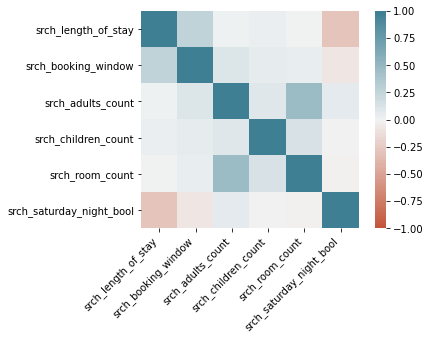

In [23]:
search_criteria = df[["srch_length_of_stay", "srch_booking_window", 
             "srch_adults_count", "srch_children_count", "srch_room_count", "srch_saturday_night_bool"]]
correlations = search_criteria.corr()
ax = sns.heatmap(
    correlations, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

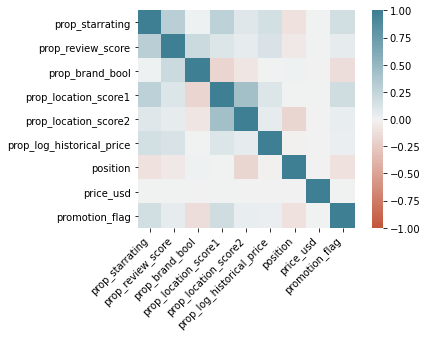

In [24]:
hotel_char = df[["prop_starrating", "prop_review_score", 
             "prop_brand_bool", "prop_location_score1", "prop_location_score2", "prop_log_historical_price",
                   "position", "price_usd", "promotion_flag"]]
correlations = hotel_char.corr()
ax = sns.heatmap(
    correlations, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
plt.show()

In [59]:
df_click = df[df["click_bool"]==1][df["booking_bool"]==1]
df_book = df[df["booking_bool"]==1]

<ipython-input-59-d6b60246d332>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_click = df[df["click_bool"]==1][df["booking_bool"]==1]


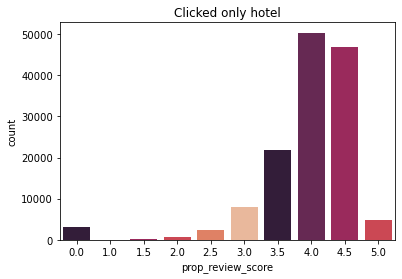

In [60]:
sns.countplot(x="prop_review_score", data = df_click, palette =sns.color_palette("rocket"))
plt.title("Clicked only hotel")
plt.show()

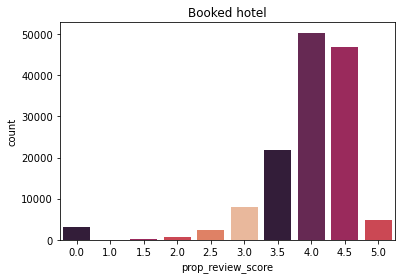

In [61]:
sns.countplot(x="prop_review_score", data = df_book, palette =sns.color_palette("rocket"))
plt.title("Booked hotel")
plt.show()